<a href="https://colab.research.google.com/github/m-agnet/Bachelor-of-Physics/blob/main/pressure_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 密度一定で, 粒子数もしくは密度が与える圧力への影響

## ファイル読み込み

In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# ファイルのパスリスト

# paths内のファイルはboxに伴ってparticlesが異なり, densityは一定のファイル.
paths = [
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box8.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box27.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box64.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box125.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box216.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box343.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box512.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box729.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box1000.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box1331.txt'
]
# 変える物理量
quantity_changed_name = 'particles'

# # paths内のファイルはdensityが異なり, particlesは一定のファイル.
# paths = [
#     '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00015625temp1.0.txt',
#     '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00125temp1.0.txt',
#     '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.01temp1.0.txt'
# ]
# # 変える物理量
# quantity_changed_name = 'density'

# データのリスト
data_list = []

# データを読み込んでリストに追加
for path in paths:
    data = pd.read_table(path, sep='\s+')
    data_list.append(data)

# 分析をする対象の物理量
quantity_name = 'Press'

# 共通設定の入力
thermo = 10000
t_step = 0.005

# 変える物理量のデータリスト
quantity_changed = [ ]



## 初期データ, 緩和時間関連のデータ加工

In [3]:
# # 見る必要がないときはコメントアウト
# # データを出力する
# for i, data in enumerate(data_list):
#     print(f"Data {i+1}:")
#     print(data)
#     print()

#     # データをプロットする
#     data.plot(x='Time', y=quantity_name)
#     plt.xlabel('Time', fontsize=12)
#     plt.ylabel(quantity_name, fontsize=12)
#     plt.title(f'Plot of {quantity_name} over Time (Data {i+1})', fontsize=14)
#     plt.grid()
#     plt.show()


In [4]:
# データ加工の設定
start = 0
end = 1000

# データを加工、出力、再格納、プロット
for i, data in enumerate(data_list):
    data = data.drop(range(start,end+1))
    data_list[i] = data  # 加工後のデータを再格納


In [5]:
# # 見る必要がないときはコメントアウト
# # データ出力
# for i, data in enumerate(data_list):
#     print(f"Data {i+1}:")
#     print(data)
#     # データをプロットする
#     data.plot(x='Time', y=quantity_name)
#     plt.xlabel('Time', fontsize=12)
#     plt.ylabel(quantity_name, fontsize=12)
#     plt.title(f'Plot of {quantity_name} over Time (Data {i+1})', fontsize=14)
#     plt.grid()
#     plt.show()


## 変える物理量によって, 表示する統計データを変更.

In [6]:
particles = [ ]
if quantity_changed_name == 'particles':
    # 各データの粒子数
    box = [8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331]
    particles = [4*b for b in box]
    DENSITY = 0.01
    volume = [p / DENSITY for p in particles]
    quantity_changed = particles

density = [ ]
if quantity_changed_name == 'density':
    # 各データの粒子数
    BOX = 512
    PARTICLES = 4*BOX
    density = [0.00015625, 0.00125, 0.01]
    volume = [PARTICLES / d for d in density]
    quantity_changed = density

## 確率密度関数

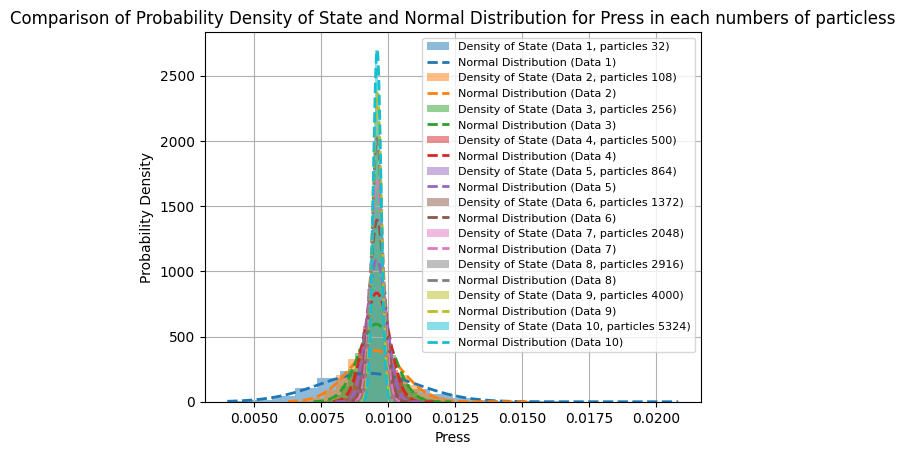

In [7]:
# 統計情報と確率密度関数を保存するリスト
statistics_list = []
pdf_list = []
mean_list = []  # 各データの平均値を保持するリスト
std_list = []  # 各データの標準偏差を保持するリスト

# グラフを描画するためのフィギュアを作成
fig, ax = plt.subplots()

# カラーマップの設定
color_map = plt.get_cmap('tab10')

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # 統計情報の計算
    mean = np.mean(quantity)
    median = np.median(quantity)
    std = np.std(quantity)
    minimum = np.min(quantity)
    maximum = np.max(quantity)
    q1, q3 = np.percentile(quantity, [25, 75])
    interquartile_range = q3 - q1

    # 確率密度関数の計算
    mu, sigma = quantity.mean(), quantity.std()
    x = np.linspace(quantity.min(), quantity.max(), 100)
    y = norm.pdf(x, mu, sigma)

    # 結果をリストに追加
    statistics = [mean, median, std, minimum, maximum, interquartile_range]
    statistics_list.append(statistics)
    pdf_list.append((x, y))
    mean_list.append(mean)
    std_list.append(std)

    # ヒストグラムの作成とプロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    label_normal = f'Normal Distribution (Data {i+1})'
    color = color_map(i % color_map.N)  # カラーマップから色を取得
    ax.hist(quantity, bins=20, density=True, alpha=0.5, color=color, label=label_density)
    ax.plot(x, y, '--', linewidth=2, color=color, label=label_normal)

# グラフを整形
ax.set_xlabel(quantity_name)
ax.set_ylabel('Probability Density')
ax.set_title(f'Comparison of Probability Density of State and Normal Distribution for {quantity_name} in each numbers of {quantity_changed_name}s')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()


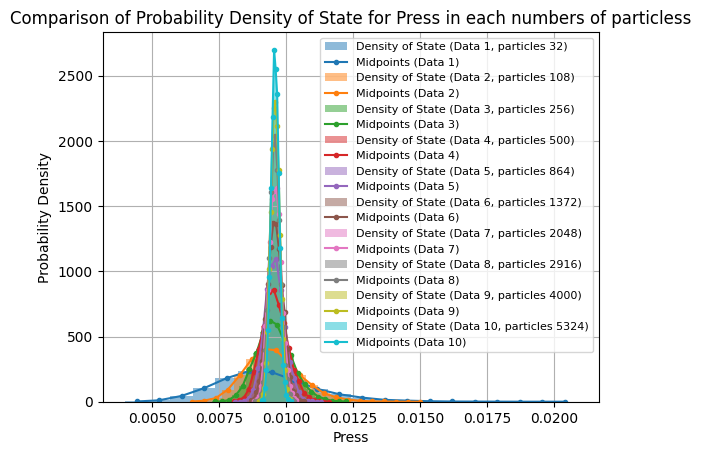

In [8]:
# グラフを描画するためのフィギュアを作成
fig, ax = plt.subplots()

# カラーマップの設定
color_map = plt.get_cmap('tab10')

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # ヒストグラムの作成とプロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    color = color_map(i % color_map.N)  # カラーマップから色を取得
    n, bins, patches = ax.hist(quantity, bins=20, density=True, alpha=0.5, color=color, label=label_density)

    # 中点の計算
    midpoints = (bins[1:] + bins[:-1]) / 2

    # 中点のプロット
    ax.plot(midpoints, n, '.-', color=color, label=f'Midpoints (Data {i+1})')

# グラフを整形
ax.set_xlabel(quantity_name)
ax.set_ylabel('Probability Density')
ax.set_title(f'Probability Density of State for {quantity_name} in each numbers of {quantity_changed_name}s')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()


In [9]:
# # ヒストグラムがらプロット
# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

# for i, data in enumerate(data_list):
#     # データ生成
#     quantity = data[quantity_name]

#     # ヒストグラムの作成とプロット
#     label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
#     ax.hist(quantity, bins=20, density=True, alpha=0.5, label=label_density)

#     # ヒストグラムの中点を取得
#     hist, bins = np.histogram(quantity, bins=100)
#     midpoints = (bins[1:] + bins[:-1]) / 2

#     # ヒストグラムの中点を結ぶグラフをプロット
#     ax.plot(midpoints, hist, '.-', linewidth=2, markersize=5, label=f'Hist Line (Data {i+1})')

# # グラフを整形
# ax.set_xlabel(quantity_name)
# ax.set_ylabel('Frequency')
# ax.set_title(f'Comparison of Histogram and Hist Line for {quantity_name} in each numbers of {quantity_changed_name}s')
# ax.legend(fontsize=8)
# ax.grid()

# # グラフを表示
# plt.show()


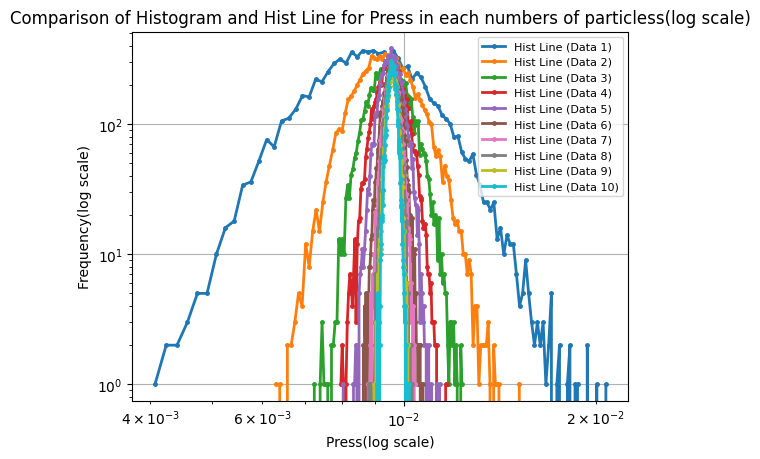

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# グラフを描画するためのフィギュアを作成
fig, ax = plt.subplots()

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # ゼロや負の値を処理する
    quantity_processed = np.maximum(quantity, 1e-10)  # ゼロや負の値を1e-10に置き換える

    # ヒストグラムの中点を取得
    hist, bins = np.histogram(quantity_processed, bins=100)
    midpoints = (bins[1:] + bins[:-1]) / 2

    # ヒストグラムの中点を結ぶグラフをプロット
    ax.plot(midpoints, hist, '.-', linewidth=2, markersize=5, label=f'Hist Line (Data {i+1})')

# グラフを整形
ax.set_xlabel(f'{quantity_name}(log scale)')
ax.set_ylabel('Frequency(log scale)')
ax.set_title(f'Comparison of Histogram and Hist Line for {quantity_name} in each numbers of {quantity_changed_name}s(log scale)')
ax.legend(fontsize=8)
ax.grid()

# 軸を対数スケールに設定
ax.set_xscale('log')
ax.set_yscale('log')

# グラフを表示
plt.show()


In [11]:
# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

# for i, data in enumerate(data_list):
#     # データ生成
#     quantity = data[quantity_name]

#     # ヒストグラムの作成
#     hist, bins = np.histogram(quantity, bins=100)

#     # ビンの中点を計算
#     bin_centers = (bins[1:] + bins[:-1]) / 2

#     # 確率密度を対数変換
#     log_hist = np.log10(hist)

#     # ヒストグラムの中点を結ぶグラフをプロット
#     label_hist = f'Hist Line (Data {i+1})'
#     ax.plot(bin_centers, log_hist, '.-', linewidth=2, markersize=5, label=label_hist)

# # グラフを整形
# ax.set_xlabel(quantity_name)
# ax.set_ylabel('Log Frequency')
# ax.set_title(f'Comparison of Hist Line (log scale) for {quantity_name} in each numbers of {quantity_changed_name}s')
# ax.legend(fontsize=8)
# ax.grid()

# # グラフを表示
# plt.show()


In [12]:
# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

# for i, data in enumerate(data_list):
#     # データ生成
#     quantity = data[quantity_name]

#     # ヒストグラムの作成
#     hist, bins = np.histogram(quantity, bins=100)

#     # ビンの中点を計算
#     bin_centers = (bins[1:] + bins[:-1]) / 2

#     # ヒストグラムの中点を結ぶグラフをプロット (縦軸を対数スケールに変更)
#     label_hist = f'Hist Line (Data {i+1})'
#     ax.semilogy(bin_centers, hist, '.-', linewidth=2, markersize=5, label=label_hist)

# # グラフを整形
# ax.set_xlabel(quantity_name)
# ax.set_ylabel('Frequency (log scale)')
# ax.set_title(f'Comparison of Hist Line (log scale) for {quantity_name} in each numbers of {quantity_changed_name}s')
# ax.legend(fontsize=8)
# ax.grid()

# # グラフを表示
# plt.show()


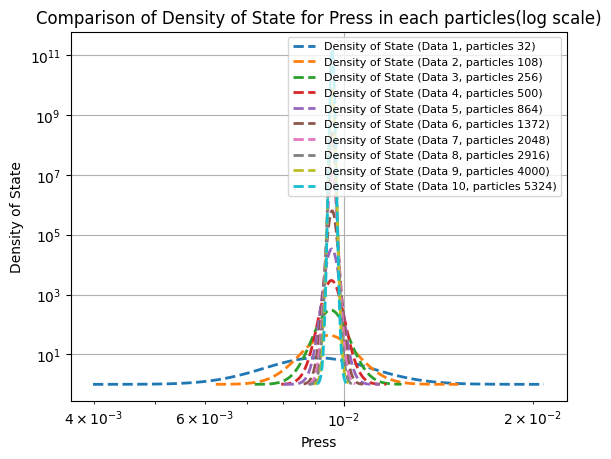

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# グラフを描画するためのフィギュアを作成
fig, ax = plt.subplots()

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # ゼロや負の値を処理する
    quantity_processed = np.maximum(quantity, 1e-10)  # ゼロや負の値を1e-10に置き換える

    # 確率密度関数の計算
    mu, sigma = np.mean(np.log(quantity_processed)), np.std(np.log(quantity_processed))
    x = np.linspace(np.log(quantity_processed.min()), np.log(quantity_processed.max()), 100)
    y = norm.pdf(x, mu, sigma)

    # プロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    ax.plot(np.exp(x), np.exp(y), '--', linewidth=2, label=label_density)

# グラフを整形
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(quantity_name)
ax.set_ylabel('Density of State')
ax.set_title(f'Comparison of Density of State for {quantity_name} in each {quantity_changed_name}(log scale)')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()


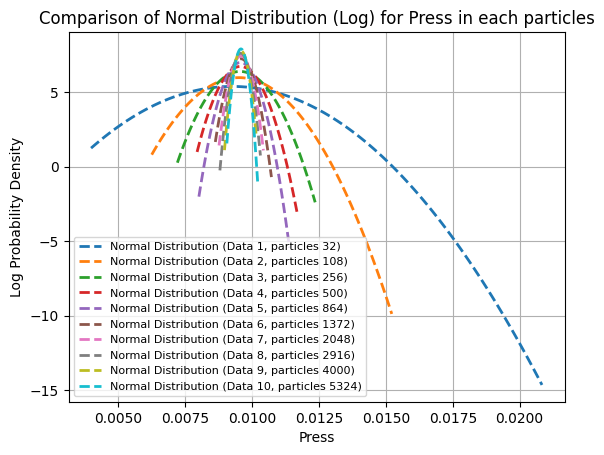

In [14]:
# 生データでやる. 数値でーたの吟味のため, energyもあとでやる
# 統計情報と確率密度関数を保存するリスト
statistics_list = []
pdf_list = []
mean_list = []  # 各データの平均値を保持するリスト
std_list = []  # 各データの標準偏差を保持するリスト

# グラフを描画するためのフィギュアを作成
fig, ax = plt.subplots()

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # 統計情報の計算
    mean = np.mean(quantity)
    median = np.median(quantity)
    std = np.std(quantity)
    minimum = np.min(quantity)
    maximum = np.max(quantity)
    q1, q3 = np.percentile(quantity, [25, 75])
    interquartile_range = q3 - q1

    # 確率密度関数の計算
    mu, sigma = quantity.mean(), quantity.std()
    x = np.linspace(quantity.min(), quantity.max(), 100)
    y = norm.pdf(x, mu, sigma)
    log_y = np.log(y)  # 対数変換

    # 結果をリストに追加
    statistics = [mean, median, std, minimum, maximum, interquartile_range]
    statistics_list.append(statistics)
    pdf_list.append((x, log_y))  # 対数変換した確率密度関数を追加
    mean_list.append(mean)
    std_list.append(std)

    # プロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    label_normal = f'Normal Distribution (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    ax.plot(x, log_y, '--', linewidth=2, label=label_normal)

# グラフを整形
ax.set_xlabel(quantity_name)
ax.set_ylabel('Log Probability Density')  # 対数変換したのでラベルを変更
ax.set_title(f'Comparison of Normal Distribution (Log) for {quantity_name} in each {quantity_changed_name}')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()

# # 統計情報の表示
# for i, statistics in enumerate(statistics_list):
#     print(f"Data {i+1}, {quantity_changed_name} {quantity_changed[i]}:")
#     print(f"Mean: {statistics[0]:.5f}")
#     print(f"Median: {statistics[1]:.5f}")
#     print(f"Standard deviation: {statistics[2]:.5f}")
#     print(f"Minimum value: {statistics[3]:.5f}")
#     print(f"Maximum value: {statistics[4]:.5f}")
#     print(f"Interquartile range: {statistics[5]:.5f}")
#     print()


## 示強性物理量の平均値

Mean values for each particles:
particles 32: 0.0092511
particles 108: 0.0095117
particles 256: 0.0095530
particles 500: 0.0095661
particles 864: 0.0095705
particles 1372: 0.0095838
particles 2048: 0.0095848
particles 2916: 0.0095817
particles 4000: 0.0095852
particles 5324: 0.0095847


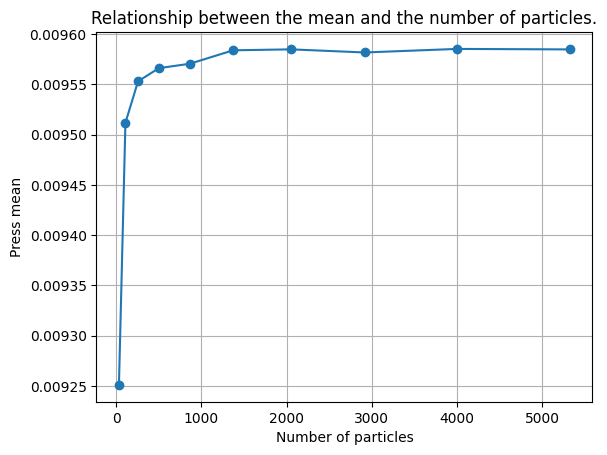

In [15]:
# 平均値について
print(f"Mean values for each {quantity_changed_name}:")
for i, mean_value in enumerate(mean_list):
    print(f"{quantity_changed_name} {quantity_changed[i]}: {mean_value:.7f}")


plt.plot(quantity_changed, mean_list, 'o-')
plt.title(f'Relationship between the mean and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'{quantity_name} mean')
plt.grid()
plt.show()


In [16]:
# import numpy as np
# from matplotlib import pyplot as plt

# x= np.linspace(-10,10,20)
# #y= x**3 +  2*x**2 + 3*x + 10+ np.random.randn(20)*50
# #y= x**11 + x**9 + 1000*x**7 + 6*x**5 + 8*x**3 + x**1 + 10 #+ np.random.randn(20)*50
# y = 0.0001*x**10 +0.01*x**7 + 1000*x**3 + 10000*x #+ np.random.randn(20)*1000

# #近似式の係数
# res1=np.polynomial.Polynomial.fit(x, y, deg=1)
# res2=np.polynomial.Polynomial.fit(x, y, deg=2)
# res3=np.polynomial.Polynomial.fit(x, y, deg=3)
# res4=np.polynomial.Polynomial.fit(x, y, deg=4)
# res10=np.polynomial.Polynomial.fit(x, y, deg=10)

# print("10次近似式")
# print(res10)

# #近似式の計算
# y1 = res1(x)
# y2 = res2(x)
# y3 = res3(x)
# y4 = res4(x)
# y10 = res10(x)

# #グラフ表示
# plt.scatter(x, y, label='original')
# plt.plot(x, y1, label='1deg')
# plt.plot(x, y2, label='2deg')
# plt.plot(x, y3, label='3deg')
# plt.plot(x, y10, label='10deg')
# plt.legend()
# plt.show()

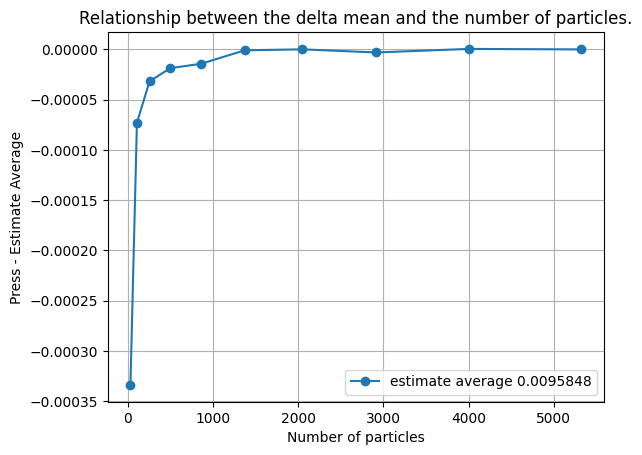

In [17]:
# estimate_ave を使って真の平均値の候補を単一に絞る
delta_mean = []
estimate_ave = 0.0095848

# 真の平均値との差.
delta_mean = [m - estimate_ave for m in mean_list]


# データをプロット
plt.plot(quantity_changed, delta_mean, 'o-', label=f'estimate average {estimate_ave}')

plt.title(f'Relationship between the delta mean and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'{quantity_name} - Estimate Average')
plt.legend()
plt.grid()
plt.show()

# print(delta_mean)

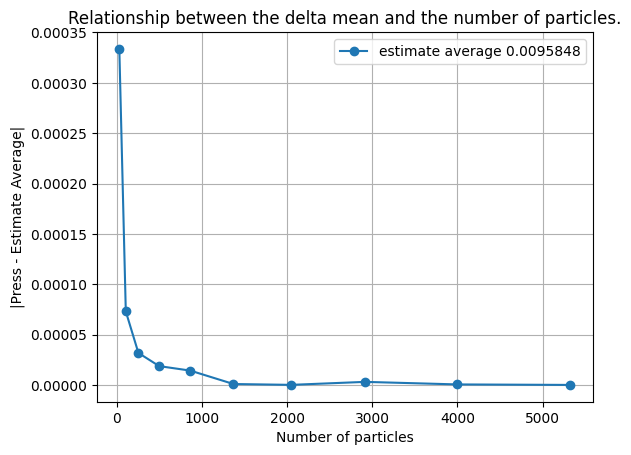

In [29]:
# y軸のデータを絶対値をとってプロット
abs_y_list = []
abs_y_list = [np.abs(d) for d in delta_mean]

# データをプロット
plt.plot(quantity_changed, abs_y_list, 'o-', label=f'estimate average {estimate_ave}')

plt.title(f'Relationship between the delta mean and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'|{quantity_name} - Estimate Average|')
plt.legend()
plt.grid()
plt.show()

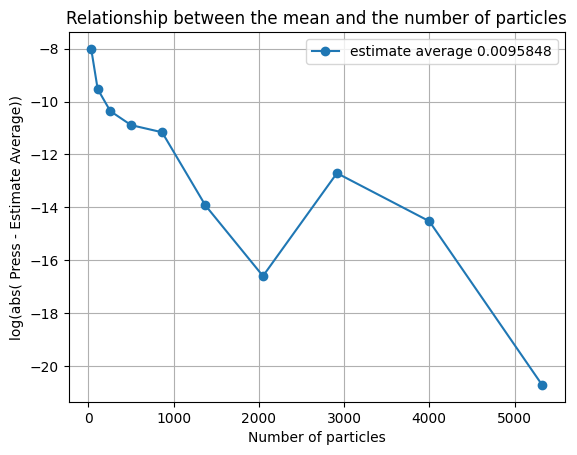

In [27]:
# 片対数プロット
log_y_list = []
log_y_list = [np.log(np.abs(d)) for d in delta_mean]

# データをプロット
plt.plot(quantity_changed, log_y_list, 'o-', label=f'estimate average {estimate_ave}')

plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
plt.legend()
plt.grid()
plt.show()


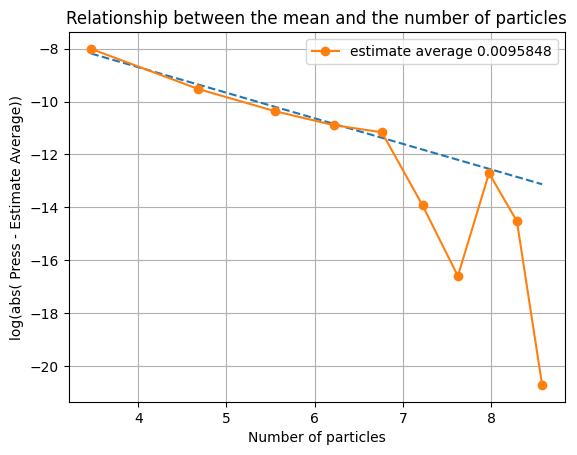

gradient=-0.9670103148066308, intercept=-4.82946432403081


In [33]:
# 両対数プロット
log_x_list = []
log_x_list = [np.log(q) for q in quantity_changed]

# 線形フィット
x = np.array(log_x_list)
y = np.array(log_y_list)
start_index = 0
end_index = 5
x_fit = x[start_index: end_index]
y_fit = y[start_index: end_index]
fit = np.polyfit(x_fit, y_fit, deg=1)
predicted_y = fit[0] * x + fit[1]
plt.plot(x, predicted_y, linestyle='--')


# データをプロット
plt.plot(log_x_list, log_y_list, 'o-', label=f'estimate average {estimate_ave}')

plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
plt.legend()
plt.grid()
plt.show()

print(f'gradient={fit[0]}, intercept={fit[1]}')

In [ ]:
tau = 0.0
if thermo < 10000:

    # 指定のx軸の範囲にあるデータだけを使ってフィットする

    xmin = 0  # 最小のx軸の値
    xmax = 100  # 最大のx軸の値, データによって調整

    mask = (x >= xmin) & (x <= xmax)
    p = np.polyfit(x[mask], y_log[mask], 1)
    y_fit = np.polyval(p, x[mask])

    # フィット直線の傾きから緩和時間を計算する
    tau = -1/p[0]
    times = [1, 2, 3, 5]
    y_vals = [np.interp(tau * t, x, y_log) for t in times]

    # プロット
    fig, ax = plt.subplots()
    ax.plot(x, y_log, label='Data')
    ax.plot(x[mask], y_fit, '--', label='Linear Fit')
    for t, y in zip(times, y_vals):
        ax.plot(tau*t, y, 'o', markersize=10, label=f'{t}*relaxation Time')
    ax.set_xlabel('Time')
    ax.set_ylabel(quantity_name)
    ax.legend()


    # zoomしたグラフの描画
    axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
    axins.plot(x, y_log)
    axins.plot(x[mask], y_fit, '--')
    # zoomしたグラフの設定
    x1, x2, y1, y2 = xmin-10, xmax+10, -4, 6
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    ax.indicate_inset_zoom(axins)

    plt.grid()
    plt.show()

    # 結果の出力
    for t, y in zip(times, y_vals):
        print(f'{t}倍緩和時間 =', t*tau)


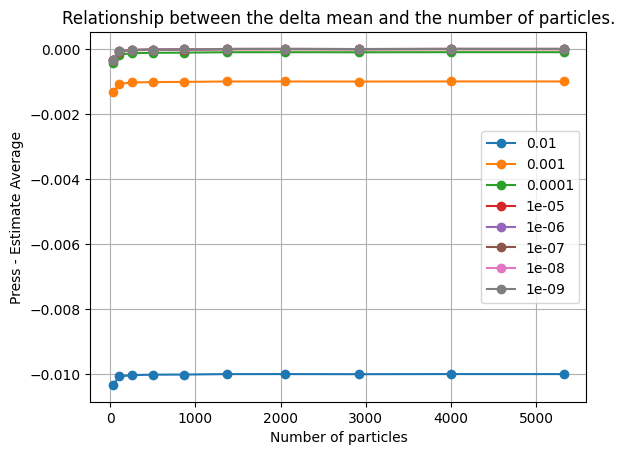

In [18]:
# closer を使って真の平均値の候補を複数用いる
delta_mean = []
delta_mean_list = []
closer = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

# 真の平均値の出し方を変えたい. closerで近づける
for c in closer:
    delta_mean = [m - (mean_list[-1] + c) for m in mean_list]
    delta_mean_list.append(delta_mean)


# データを重ねてプロット
for idx, delta_mean in enumerate(delta_mean_list):
    plt.plot(quantity_changed, delta_mean, 'o-', label=f'{closer[idx]}')


plt.title(f'Relationship between the delta mean and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'{quantity_name} - Estimate Average')
plt.legend()
plt.grid()
plt.show()

# print(delta_mean_list)

## 緩和粒子数を求める

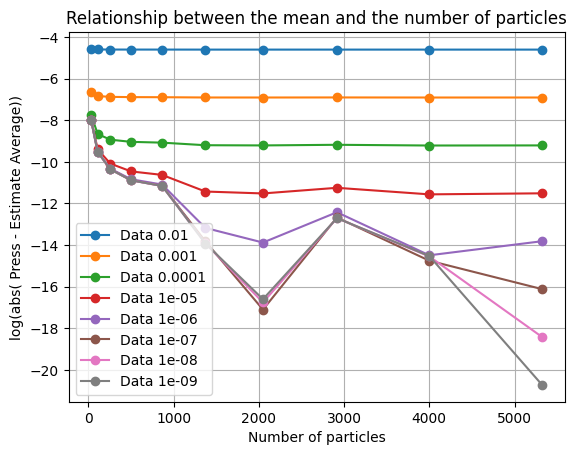

In [19]:
# 片対数プロット
delta_mean_list = []


# 真の平均値に近づけるための値
for c in closer:
    delta_mean = [m - (mean_list[-1] + c) for m in mean_list]
    delta_mean_list.append(delta_mean)

residual_sums = []  # 残差平方和を保存するリスト

for idx, delta_mean in enumerate(delta_mean_list):
    # logをとる
    x = np.array(quantity_changed)  # particlesをNumPy配列に変換
    # x = np.log(particles)  # particlesをNumPy配列に変換
    y = np.log(np.abs(delta_mean))
    # fit = np.polyfit(x, y, deg=4)  # 1次の多項式による線形フィット
    # predicted_y = fit[0] * x * x * x * x + fit[1] * x * x * x + fit[2] * x * x + fit[3] * x + fit[4] # 線形フィットによる予測値

    # # 残差平方和の計算
    # residuals = y - predicted_y
    # residual_sum = np.sum(residuals**2)
    # residual_sums.append(residual_sum)

    # 対数変換のプロット
    plt.plot(x, y, 'o-', label=f'Data {closer[idx]}')
    # plt.plot(x, predicted_y, color='red', linestyle='--')  # 線形フィットのプロット
    # print(f"Data {closer[idx]}: gradient={fit[0]}, intercept={fit[1]}")


    # # 残差のプロット（任意）
    # plt.plot(x, residuals, 'x-', label=f'Residuals {idx}')

# グラフの設定と表示
plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
plt.legend()
plt.grid()
plt.show()

# # 残差平方和の表示
# for idx, residual_sum in enumerate(residual_sums):
#     print(f"Data {closer[idx]}: Residual Sum of Squares = {residual_sum}")


Data 0.01: gradient=-0.004899205268406426, intercept=-4.567965291509348
Data 0.001: gradient=-0.04366133928725581, intercept=-6.57541217234942
Data 0.0001: gradient=-0.24271012318540533, intercept=-7.336646014345531
Data 1e-05: gradient=-0.6799620277569776, intercept=-6.06863141395148
Data 1e-06: gradient=-1.2254878608521296, intercept=-3.622118265869466
Data 1e-07: gradient=-1.5760332655418112, intercept=-1.9788609810598696
Data 1e-08: gradient=-1.731864431907213, intercept=-1.1339478281715067
Data 1e-09: gradient=-1.9043855295779883, intercept=-0.20299894229606913


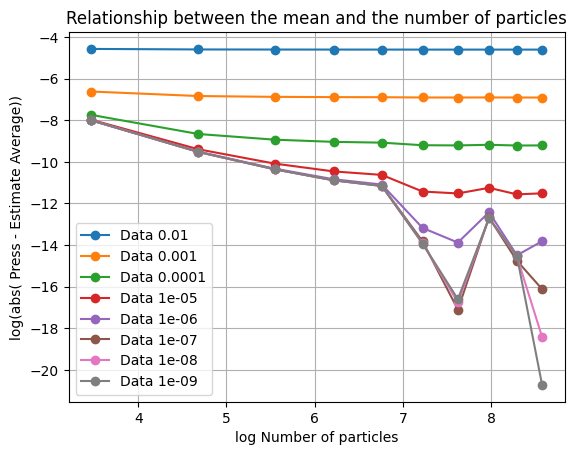

Data 0.01: Residual Sum of Squares = 0.00032829363214640543
Data 0.001: Residual Sum of Squares = 0.023810995887059982
Data 0.0001: Residual Sum of Squares = 0.4190488682606317
Data 1e-05: Residual Sum of Squares = 0.8148323239784621
Data 1e-06: Residual Sum of Squares = 3.7603770496812023
Data 1e-07: Residual Sum of Squares = 17.320829167387195
Data 1e-08: Residual Sum of Squares = 22.617029394542524
Data 1e-09: Residual Sum of Squares = 37.18282251064815


In [20]:
# 両対数プロット
delta_mean_list = []

# 真の平均値に近づけるための値
for c in closer:
    delta_mean = [m - (mean_list[-1] + c) for m in mean_list]
    delta_mean_list.append(delta_mean)

residual_sums = []  # 残差平方和を保存するリスト

for idx, delta_mean in enumerate(delta_mean_list):
    # logをとる
    # x = np.array(particles)  # particlesをNumPy配列に変換
    x = np.log(quantity_changed)  # particlesをNumPy配列に変換
    y = np.log(np.abs(delta_mean))
    fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット
    predicted_y = fit[0] * x + fit[1]  # 線形フィットによる予測値

    # 残差平方和の計算
    residuals = y - predicted_y
    residual_sum = np.sum(residuals**2)
    residual_sums.append(residual_sum)

    # 対数変換のプロット
    plt.plot(x, y, 'o-', label=f'Data {closer[idx]}')
    # plt.plot(x, predicted_y, color='red', linestyle='--')  # 線形フィットのプロット
    print(f"Data {closer[idx]}: gradient={fit[0]}, intercept={fit[1]}")


    # # 残差のプロット（任意）
    # plt.plot(x, residuals, 'x-', label=f'Residuals {idx}')

# グラフの設定と表示
plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
plt.xlabel(f'log Number of {quantity_changed_name}')
plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
plt.legend()
plt.grid()
plt.show()

# 残差平方和の表示
for idx, residual_sum in enumerate(residual_sums):
    print(f"Data {closer[idx]}: Residual Sum of Squares = {residual_sum}")


In [21]:
# delta_mean_list = []
# closer = [(1/4)*1e-8, (1/2)*1e-8, 1e-8]

# # 真の平均値に近づけるための値
# for c in closer:
#     delta_mean = [m - (mean_list[-1] + c) for m in mean_list]
#     delta_mean_list.append(delta_mean)

# residual_sums = []  # 残差平方和を保存するリスト

# for idx, delta_mean in enumerate(delta_mean_list):
#     # logをとる
#     x = np.array(quantity_changed)  # particlesをNumPy配列に変換
#     # x = np.log(particles)  # particlesをNumPy配列に変換
#     y = np.log(np.abs(delta_mean))
#     fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット
#     predicted_y = fit[0] * x + fit[1]  # 線形フィットによる予測値

#     # 残差平方和の計算
#     residuals = y - predicted_y
#     residual_sum = np.sum(residuals**2)
#     residual_sums.append(residual_sum)

#     # 対数変換のプロット
#     plt.plot(x, y, 'o-', label=f'Data {closer[idx]}')
#     plt.plot(x, predicted_y, color='red', linestyle='--')  # 線形フィットのプロット
#     print(f"Data {closer[idx]}: gradient={fit[0]}, intercept={fit[1]}")


#     # # 残差のプロット（任意）
#     # plt.plot(x, residuals, 'x-', label=f'Residuals {idx}')

# # グラフの設定と表示
# plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
# plt.xlabel(f'Number of {quantity_changed_name}')
# plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
# plt.legend()
# plt.grid()
# plt.show()

# # 残差平方和の表示
# for idx, residual_sum in enumerate(residual_sums):
#     print(f"Data {closer[idx]}: Residual Sum of Squares = {residual_sum}")


## 示強性物理量の標準偏差

Stndard deviation for each data:
particles 32: 0.00183
particles 108: 0.00101
particles 256: 0.00067
particles 500: 0.00048
particles 864: 0.00037
particles 1372: 0.00029
particles 2048: 0.00024
particles 2916: 0.00020
particles 4000: 0.00017
particles 5324: 0.00015


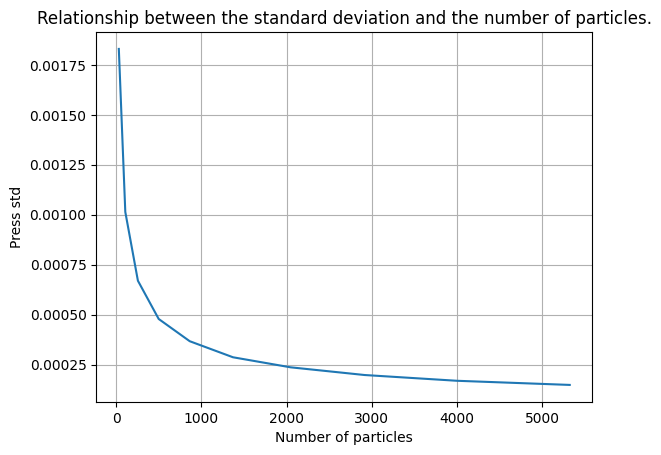

In [22]:
# 標準偏差について
print("Stndard deviation for each data:")
for i, std_value in enumerate(std_list):
    print(f"{quantity_changed_name} {quantity_changed[i]}: {std_value:.5f}")



plt.plot(quantity_changed, std_list)
plt.title(f'Relationship between the standard deviation and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'{quantity_name} std')
plt.grid()
plt.show()


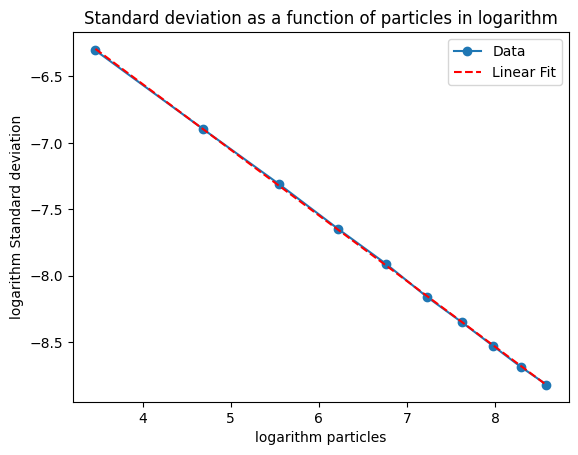

gradient=-0.49474978360448074


In [23]:
# 標準偏差プロットを対数とって傾きをみる.
# 対数変換
x = np.log(quantity_changed)
y = np.log(std_list)
fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット

# プロット
plt.plot(x, y, 'o-')
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='--')  # 線形フィットのプロット
plt.xlabel(f'logarithm {quantity_changed_name}')
plt.ylabel(f'logarithm Standard deviation')
plt.title(f'Standard deviation as a function of {quantity_changed_name} in logarithm')
plt.legend(['Data', 'Linear Fit'])
plt.show()
print(f"gradient={fit[0]}")


# 状態方程式

## ファイル読み込み2

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# ファイルのパスリスト
paths = [
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00015625temp1.0.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00015625temp1.1.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00015625temp1.2.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00125temp1.0.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00125temp1.1.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00125temp1.2.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.01temp1.0.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.01temp1.1.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.01temp1.2.txt'
]

# データのリスト
data_list = []

# データを読み込んでリストに追加
for path in paths:
    data = pd.read_table(path, sep='\s+')
    data_list.append(data)

# 密度と温度のデータ
quantity_changed_dict = {
    'density': [0.00015625, 0.00125, 0.01],
    'temp': [1.0, 1.1, 1.2]
}



In [25]:
# # 見る必要が無い場合はコメントアウト
# # データを出力する
# num = 0

# for density in quantity_changed_dict['density']:
#     for temp in quantity_changed_dict['temp']:
#         data = data_list[num]

#         print(f"Data {num+1} density {density} temp {temp}:")
#         print(data)
#         print()

#         # データをプロットする
#         plt.plot(data['Time'], data[quantity_name])
#         plt.xlabel('Time', fontsize=12)
#         plt.ylabel(quantity_name, fontsize=12)
#         plt.title(f'Plot of {quantity_name} over Time (Data {num+1})', fontsize=14)
#         plt.grid()
#         plt.show()
#         num += 1
